In [31]:
top=10
top_annotation=40
threshold = -np.log10(0.05)


import matplotlib.pyplot as plt

Conditions = {('mock_none_24', 'mock_none_72'),('IAV_none_24', 'IAV_none_72'), ('IAV_UV_24', 'IAV_none_24'), ('IAV_UV_72', 'IAV_none_72'), ('mock_none_24', 'IAV_none_24'), ('mock_none_24', 'IAV_UV_24'),
              ('mock_none_24', 'MPV_none_24'), ('mock_none_24', 'MPV_UV_24'), ('mock_none_24', 'PIV3_none_24'), ('mock_none_24', 'PIV3_UV_24'),
              ('mock_none_72', 'IAV_none_72'), ('mock_none_72', 'IAV_UV_72'), ('mock_none_72', 'MPV_none_72'), ('mock_none_72', 'MPV_UV_72'), ('mock_none_72', 'PIV3_none_72'),
              ('mock_none_72', 'PIV3_UV_72'), ('MPV_none_24', 'MPV_none_72'), ('MPV_UV_24', 'MPV_none_24'), ('MPV_UV_72', 'MPV_none_72'),
              ('PIV3_none_24', 'PIV3_none_72'), ('PIV3_UV_24', 'PIV3_none_24'), ('PIV3_UV_72', 'PIV3_none_72'), ('untreated_none_24', 'IAV_none_24'),
              ('untreated_none_24', 'IAV_UV_24'), ('untreated_none_24', 'mock_none_24'), ('untreated_none_24', 'MPV_none_24'),
              ('untreated_none_24', 'MPV_UV_24'), ('untreated_none_24', 'PIV3_none_24'), ('untreated_none_24', 'PIV3_UV_24'),
              ('untreated_none_72', 'IAV_none_72'), ('untreated_none_72', 'IAV_UV_72'), ('untreated_none_72', 'mock_none_72'),
              ('untreated_none_72', 'MPV_none_72'), ('untreated_none_72', 'MPV_UV_72'), ('untreated_none_72', 'PIV3_none_72'), ('untreated_none_72', 'PIV3_UV_72')}

 
 
    
    
output_dict = {}  # Create an empty dictionary
i=0
for conditionA, conditionB in sorted(Conditions):
    i=i+1
    print(i)
    file_name = f"GLMQL_{conditionA}_to_{conditionB}.csv"
    DDAATTAA = pd.read_csv(file_name, encoding='unicode_escape')



1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36


Mock_24_72


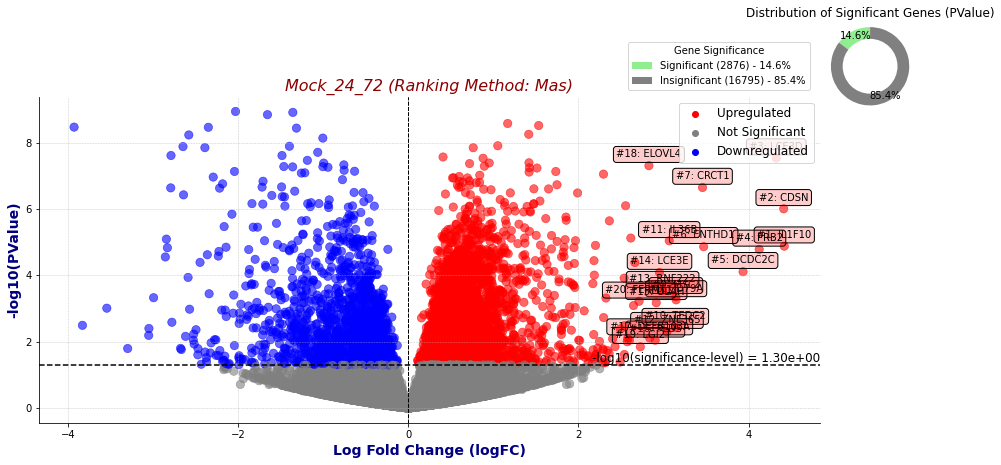

Running as a standalone script
{'method': 'PValue', 'alpha': 0.05, 'logFC_threshold': 0, 'up_or_down_or_both': 'Only_upregulated', 'highlight_genes': [], 'top_genes': 20, 'upreg_criteria': None, 'downreg_criteria': None, 'upregulated_color': '#FF0000', 'downregulated_color': '#0000FF', 'not_significant_color': '#808080', 'not_significant_between_logFC_threshold_color': '#A0A0A0', 'pie_chart_size': 0.2, 'pie_chart_position': (0.85, 0.85), 'ranking_method': 'MAS', 'Magnitude (M)': 1, 'Altitude (A)': 0, 'g100': (-1, 0.2), 'g010': (1, 0.24), 'g001': (-0.4, -0.5), 'g110': (-0.6, 0.24), 'g101': (-0.8, -0.3), 'g011': (0.7, -0.1), 'g111': (0.4, -0.6)}


In [41]:
num_dataframes = 3

Mock_24_72= pd.read_csv("GLMQL_mock_none_24_to_mock_none_72.csv", encoding= 'unicode_escape')


dataframes = {'Mock_24_72':Mock_24_72}
Conditions =list(dataframes.keys())





# 'method': 'PValue', 'BH', 'Bonferroni', 'BY', 'Holm', 'Hochberg'
#  'ranking_method':'MAS', 'Corner'
#'up_or_down_or_both': 'both_up_and_down_regulated','Only_upregulated', 'Only_downregulated'

# Initialize the dictionary to store the significant genes for each comparison
significant_genes_dict = {}
significant_genes_dataframe_dict = {}
All_genes_dict = {}

# Initialize the counter
i = 0

for condition in sorted(Conditions):
    i += 1
    print(f"{condition}")

    Data = dataframes[condition]
    title = f"{condition}"

    # Running the volcano_plot function and obtaining the significant genes
    AllGenes, Significant = volcano_plot(Data,title, M=config['Magnitude (M)'], A=config['Altitude (A)'], method=config['method'], alpha=config['alpha'], logFC_threshold=config['logFC_threshold'], highlight_genes=config['highlight_genes'], top_genes=config['top_genes'],
                                upreg_criteria=config['upreg_criteria'], downreg_criteria=config['downreg_criteria'], upregulated_color=config['upregulated_color'], downregulated_color=config['downregulated_color'],
                                not_significant_color=config['not_significant_color'], not_significant_between_logFC_threshold_color=config['not_significant_between_logFC_threshold_color'],
                                pie_chart_size=config['pie_chart_size'], pie_chart_position=config['pie_chart_position'], ranking_method=config['ranking_method'],up_or_down_or_both=config['up_or_down_or_both'],g100=config['g100'],g010=config['g010'],g001=config['g001'],g110=config['g110'],g101=config['g101'],g011=config['g011'],g111=config['g111'])


    # Storing the significant genes in the dictionary
    key = f"{condition}"
    significant_genes = set(Significant['Gene Symbol'])
    significant_genes_dataframe = Significant
    significant_genes_dataframe_dict[key] = significant_genes_dataframe

    if significant_genes:
        significant_genes_dict[key] = significant_genes

    All_genes_dict[condition] = AllGenes

# Create the Venn diagram

# Using positions from the config dictionary for annotations
annotation_positions = {
    'g100': (-1, 0.2),
    'g010': (1, 0.24),
    'g001': (-0.4, -0.5),
    'g110': (-0.6, 0.24),
    'g101': (-0.8, -0.3),
    'g011': (0.7, -0.1),
    'g111': (0.4, -0.8)
}

print("Running as a standalone script")
print(config)

In [42]:
Significant

,Gene Symbol,logFC,logCPM,F,PValue,FDR,MAS_Score,MAS_rank,-log10(P),Category
0,IL1F10,4.418017,2.145537,56.366749,1.312677e-05,0.000882,4.418017,1,4.881842,Upregulated
1,CDSN,4.411384,3.468218,97.196394,9.789354e-07,0.000167,4.411384,2,6.009246,Upregulated
2,LCE3D,4.323585,4.358535,195.781659,2.876009e-08,0.000026,4.323585,3,7.541210,Upregulated
3,PRB2,4.123644,2.128225,53.690200,1.640741e-05,0.001024,4.123644,4,4.784960,Upregulated
4,DCDC2C,3.933816,2.001661,135.566342,7.745351e-05,0.002622,3.933816,5,4.110959,Upregulated
...,...,...,...,...,...,...,...,...,...,...
2871,RPL36AL,0.136162,8.414883,5.481716,3.945796e-02,0.198460,0.136162,2872,1.403865,Upregulated
2872,RND3,0.134286,8.457378,6.498294,2.735829e-02,0.152975,0.134286,2873,1.562911,Upregulated
2873,ADIPOR1,0.122781,8.347073,5.232744,4.335359e-02,0.210882,0.122781,2874,1.362975,Upregulated
2874,EIF2S2,0.116733,8.636306,5.641242,3.718409e-02,0.190222,0.116733,2875,1.429643,Upregulated


Mock_to_IAV_24


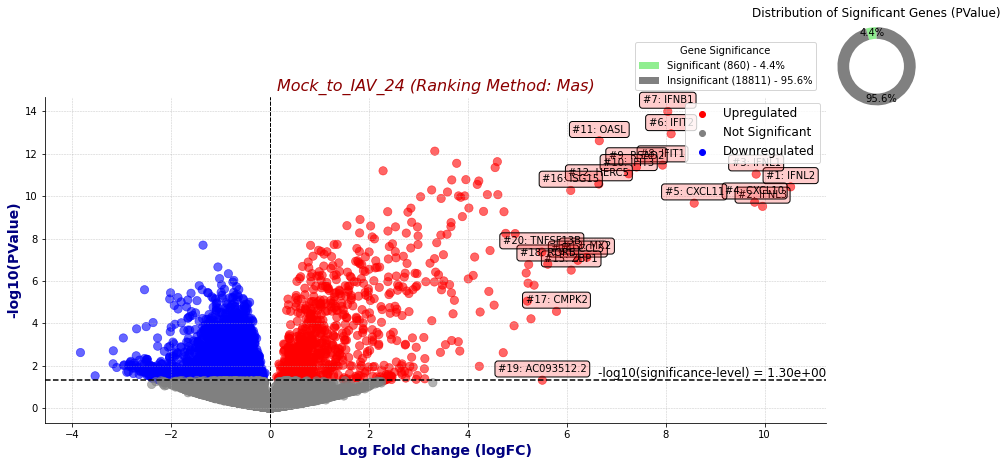

Mock_to_MPV_24


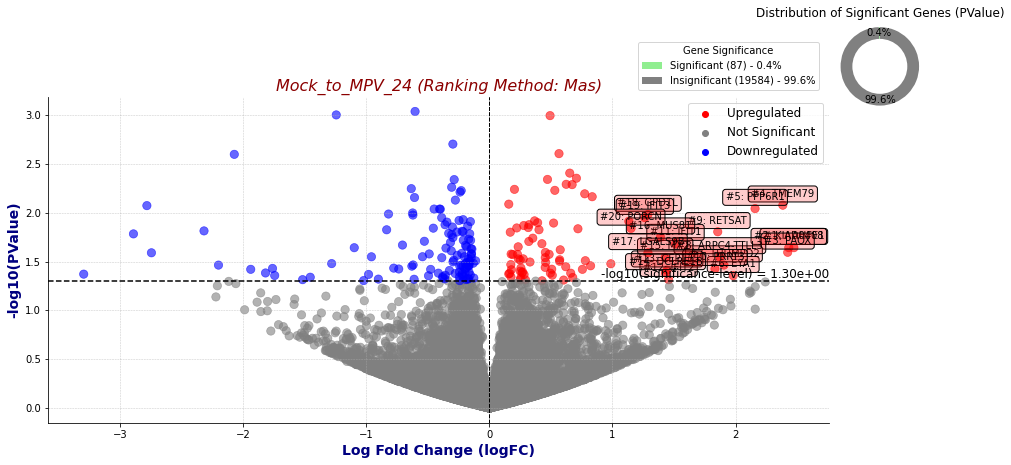

Mock_to_PIV3_24


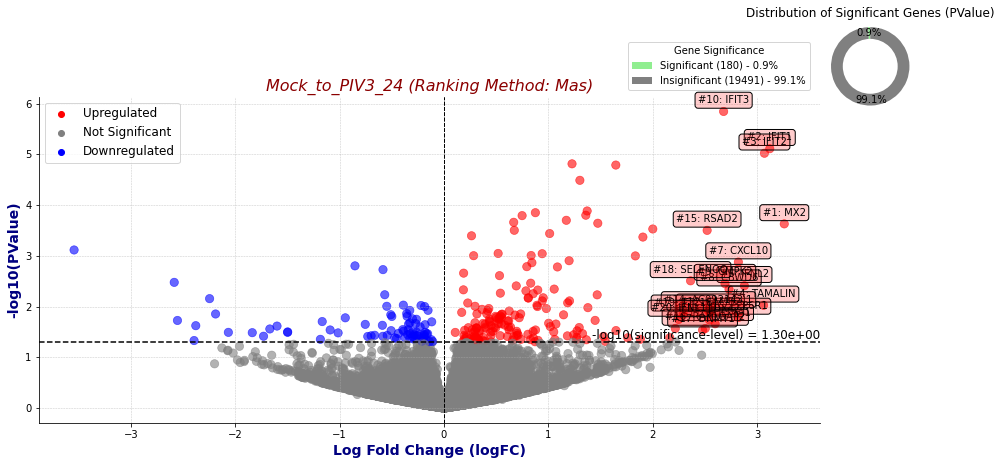

The gene whose maximum Rank is minimum among all comparisons is IFIT1
Running as a standalone script
{'method': 'PValue', 'alpha': 0.05, 'logFC_threshold': 0, 'up_or_down_or_both': 'Only_upregulated', 'highlight_genes': [], 'top_genes': 20, 'upreg_criteria': None, 'downreg_criteria': None, 'upregulated_color': '#FF0000', 'downregulated_color': '#0000FF', 'not_significant_color': '#808080', 'not_significant_between_logFC_threshold_color': '#A0A0A0', 'pie_chart_size': 0.2, 'pie_chart_position': (0.85, 0.85), 'ranking_method': 'MAS', 'Magnitude (M)': 1, 'Altitude (A)': 0, 'g100': (-1, 0.2), 'g010': (1, 0.24), 'g001': (-0.4, -0.5), 'g110': (-0.6, 0.24), 'g101': (-0.8, -0.3), 'g011': (0.7, -0.1), 'g111': (0.4, -0.6)}


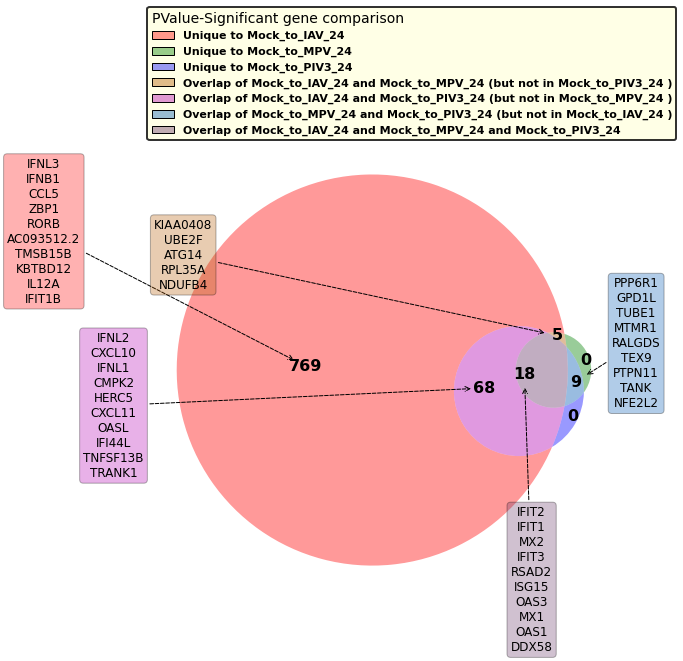

In [43]:
num_dataframes = 3

Mock_to_IAV_24= pd.read_csv("GLMQL_mock_none_24_to_IAV_none_24.csv", encoding= 'unicode_escape')
Mock_to_MPV_24= pd.read_csv("GLMQL_mock_none_24_to_MPV_none_24.csv", encoding= 'unicode_escape')
Mock_to_PIV3_24= pd.read_csv("GLMQL_mock_none_24_to_PIV3_none_24.csv", encoding= 'unicode_escape')

dataframes = {'Mock_to_IAV_24':Mock_to_IAV_24, 'Mock_to_MPV_24':Mock_to_MPV_24, 'Mock_to_PIV3_24': Mock_to_PIV3_24}
Conditions =list(dataframes.keys())





# 'method': 'PValue', 'BH', 'Bonferroni', 'BY', 'Holm', 'Hochberg'
#  'ranking_method':'MAS', 'Corner'
#'up_or_down_or_both': 'both_up_and_down_regulated','Only_upregulated', 'Only_downregulated'

# Initialize the dictionary to store the significant genes for each comparison
significant_genes_dict = {}
significant_genes_dataframe_dict = {}
All_genes_dict = {}

# Initialize the counter
i = 0

for condition in sorted(Conditions):
    i += 1
    print(f"{condition}")

    Data = dataframes[condition]
    title = f"{condition}"

    # Running the volcano_plot function and obtaining the significant genes
    AllGenes, Significant = volcano_plot(Data,title, M=config['Magnitude (M)'], A=config['Altitude (A)'], method=config['method'], alpha=config['alpha'], logFC_threshold=config['logFC_threshold'], highlight_genes=config['highlight_genes'], top_genes=config['top_genes'],
                                upreg_criteria=config['upreg_criteria'], downreg_criteria=config['downreg_criteria'], upregulated_color=config['upregulated_color'], downregulated_color=config['downregulated_color'],
                                not_significant_color=config['not_significant_color'], not_significant_between_logFC_threshold_color=config['not_significant_between_logFC_threshold_color'],
                                pie_chart_size=config['pie_chart_size'], pie_chart_position=config['pie_chart_position'], ranking_method=config['ranking_method'],up_or_down_or_both=config['up_or_down_or_both'],g100=config['g100'],g010=config['g010'],g001=config['g001'],g110=config['g110'],g101=config['g101'],g011=config['g011'],g111=config['g111'])


    # Storing the significant genes in the dictionary
    key = f"{condition}"
    significant_genes = set(Significant['Gene Symbol'])
    significant_genes_dataframe = Significant
    significant_genes_dataframe_dict[key] = significant_genes_dataframe

    if significant_genes:
        significant_genes_dict[key] = significant_genes

    All_genes_dict[condition] = AllGenes

# Create the Venn diagram

# Using positions from the config dictionary for annotations
annotation_positions = {
    'g100': (-1, 0.2),
    'g010': (1, 0.24),
    'g001': (-0.4, -0.5),
    'g110': (-0.6, 0.24),
    'g101': (-0.8, -0.3),
    'g011': (0.7, -0.1),
    'g111': (0.4, -0.8)
}

plot_venn(significant_genes_dataframe_dict, method=config['method'], ranking_method=config['ranking_method'],g100=annotation_positions['g100'],g010=annotation_positions['g010'],g001=annotation_positions['g001'],g110=annotation_positions['g110'],g101=annotation_positions['g101'],g011=annotation_positions['g011'],g111=annotation_positions['g111'])
print("Running as a standalone script")
print(config)

The gene whose maximum Rank is minimum among all comparisons is IFIT1


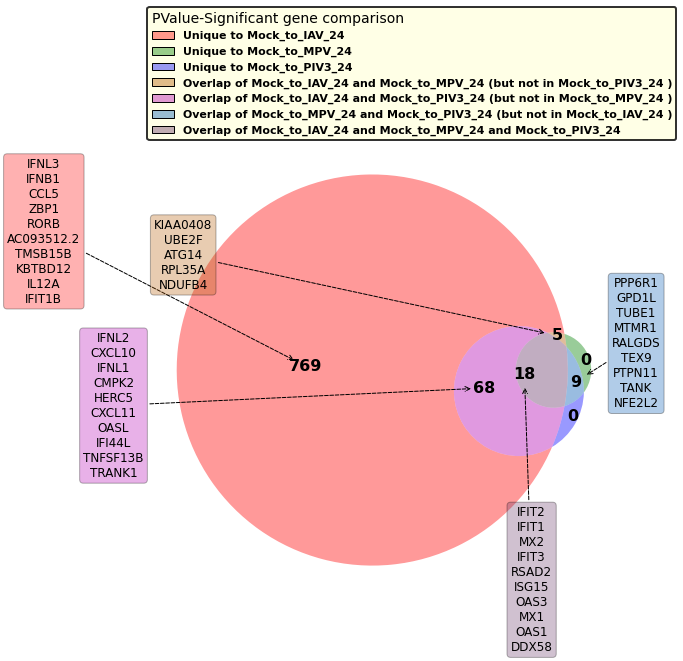

In [44]:
plot_venn(significant_genes_dataframe_dict, method=config['method'], ranking_method=config['ranking_method'],g100=annotation_positions['g100'],g010=annotation_positions['g010'],g001=annotation_positions['g001'],g110=annotation_positions['g110'],g101=annotation_positions['g101'],g011=annotation_positions['g011'],g111=annotation_positions['g111'])


In [45]:
significant_genes_dataframe_dict['Mock_to_IAV_24']

,Gene Symbol,logFC,logCPM,F,PValue,FDR,MAS_Score,MAS_rank,-log10(P),Category
0,IFNL2,10.526789,7.563255,694.894222,3.637454e-11,3.975131e-08,10.526789,1,10.439203,Upregulated
1,IFNL3,9.959096,6.546617,466.179630,3.037916e-10,1.927705e-07,9.959096,2,9.517424,Upregulated
2,IFNL1,9.829374,7.406913,900.225146,9.121300e-12,1.495209e-08,9.829374,3,11.039943,Upregulated
3,CXCL10,9.799162,10.463126,507.522588,1.936065e-10,1.313253e-07,9.799162,4,9.713080,Upregulated
4,CXCL11,8.576563,8.492100,498.003455,2.140658e-10,1.403629e-07,8.576563,5,9.669453,Upregulated
...,...,...,...,...,...,...,...,...,...,...
855,NDUFV2,0.178962,8.092279,10.326820,8.418574e-03,7.673854e-02,0.178962,856,2.074761,Upregulated
856,AKIRIN2,0.171944,6.916385,5.877075,3.996742e-02,1.956206e-01,0.171944,857,1.398294,Upregulated
857,CXCL1,0.166640,9.327462,5.641828,3.715654e-02,1.869725e-01,0.166640,858,1.429965,Upregulated
858,CALCOCO2,0.166575,6.937216,14.108563,4.815173e-02,2.196643e-01,0.166575,859,1.317388,Upregulated


In [46]:
# Re-initializing to ensure clarity in the approach
conditions_significant_genes = []  # To store lists of significant genes for each condition

Conditions = {'Mock_to_IAV_24','Mock_to_MPV_24','Mock_to_PIV3_24'}

for condition in Conditions:
    gene_list = []
    BH_adjusted_p_values = significant_genes_dataframe_dict[condition]['PValue']

    for i, p in enumerate(BH_adjusted_p_values):
        if p < 0.05:
            gene_list.append(significant_genes_dataframe_dict[condition].loc[i, 'Gene Symbol'])

    # Store the significant genes list for each condition
    conditions_significant_genes.append(set(gene_list))

# Finding common significant genes among all conditions
common_significant_genes = set.intersection(*conditions_significant_genes)
common_significant_genes

####################################

filtered_df1 = significant_genes_dataframe_dict['Mock_to_IAV_24'][
    ( significant_genes_dataframe_dict['Mock_to_IAV_24']['Gene Symbol'].isin(common_significant_genes)) 
]

filtered_df2 = significant_genes_dataframe_dict['Mock_to_MPV_24'][
    ( significant_genes_dataframe_dict['Mock_to_MPV_24']['Gene Symbol'].isin(common_significant_genes)) 
]

filtered_df3 = significant_genes_dataframe_dict['Mock_to_PIV3_24'][
    ( significant_genes_dataframe_dict['Mock_to_PIV3_24']['Gene Symbol'].isin(common_significant_genes)) 
]




#################################



IAV=filtered_df1[['Gene Symbol','MAS_Score','PValue','MAS_rank']]
MPV=filtered_df2[['Gene Symbol','MAS_Score','PValue','MAS_rank']]
PIV3=filtered_df3[['Gene Symbol','MAS_Score','PValue','MAS_rank']]




################################

# Combining the dataframes
combined_df = pd.concat([IAV, MPV, PIV3])

# Your required operation starts here
# Group by 'Gene Symbol' and sum up all other columns
aggregated_df = combined_df.groupby('Gene Symbol').sum().reset_index()

# Rename columns to have 'sum_' prefix, excluding 'Gene Symbol'
aggregated_df.columns = ['Gene Symbol'] + ['sum_' + col if col != 'Gene Symbol' else col for col in aggregated_df.columns[1:]]

# Sorting the aggregated dataframe in descending order based on 'sum_MAS_rank'
aggregated_df_sorted = aggregated_df.sort_values(by='sum_MAS_rank', ascending=True).reset_index(drop=True)

aggregated_df_sorted





,Gene Symbol,sum_MAS_Score,sum_PValue,sum_MAS_rank
0,IFIT1,12.572136,0.020724,21
1,IFIT2,12.638769,0.048524,21
2,MX2,11.095020,0.028928,29
3,IFIT3,11.195650,0.011244,39
4,RSAD2,11.065278,0.012561,45
5,ISG15,8.011414,0.030497,92
6,OAS3,6.742917,0.006537,95
7,MX1,6.763933,0.002499,103
8,OAS1,6.200751,0.039554,129
9,DDX58,6.088541,0.012963,131


In [47]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles

conditions_significant_genes = []  # To store lists of significant genes for each condition

Conditions = ['Mock_to_IAV_24','Mock_to_MPV_24','Mock_to_PIV3_24']

for condition in Conditions:
    gene_list = []
    BH_adjusted_p_values = significant_genes_dataframe_dict[condition]['PValue']

    for i, p in enumerate(BH_adjusted_p_values):
        if p < 0.05:
            gene_list.append(significant_genes_dataframe_dict[condition].loc[i, 'Gene Symbol'])

    # Store the significant genes list for each condition
    conditions_significant_genes.append(set(gene_list))

# Finding common significant genes among all conditions
common_significant_genes = set.intersection(*conditions_significant_genes)
common_significant_genes

####################################

filtered_df1 = significant_genes_dataframe_dict[Conditions[0]][
    ( significant_genes_dataframe_dict[Conditions[0]]['Gene Symbol'].isin(common_significant_genes)) 
]

filtered_df2 = significant_genes_dataframe_dict[Conditions[1]][
    ( significant_genes_dataframe_dict[Conditions[1]]['Gene Symbol'].isin(common_significant_genes)) 
]

filtered_df3 = significant_genes_dataframe_dict[Conditions[2]][
    ( significant_genes_dataframe_dict[Conditions[2]]['Gene Symbol'].isin(common_significant_genes)) 
]




#################################



IAV=filtered_df1[['Gene Symbol','MAS_Score','PValue','MAS_rank']]
MPV=filtered_df2[['Gene Symbol','MAS_Score','PValue','MAS_rank']]
PIV3=filtered_df3[['Gene Symbol','MAS_Score','PValue','MAS_rank']]




################################

# Combining the dataframes
combined_df = pd.concat([IAV, MPV, PIV3])

# Your required operation starts here
# Group by 'Gene Symbol' and sum up all other columns
aggregated_df = combined_df.groupby('Gene Symbol').sum().reset_index()

# Rename columns to have 'sum_' prefix, excluding 'Gene Symbol'
aggregated_df.columns = ['Gene Symbol'] + ['sum_' + col if col != 'Gene Symbol' else col for col in aggregated_df.columns[1:]]

# Sorting the aggregated dataframe in descending order based on 'sum_MAS_rank'
aggregated_df_sorted = aggregated_df.sort_values(by='sum_MAS_rank', ascending=True).reset_index(drop=True)




###########################



import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from matplotlib.patches import Patch

top_10_genes = aggregated_df_sorted['Gene Symbol'].head(10).tolist()

# Extract sets of significant genes from the dictionary for each condition
genes_set_IAV = set(significant_genes_dataframe_dict[Conditions[0]]['Gene Symbol'])
genes_set_MPV = set(significant_genes_dataframe_dict[Conditions[1]]['Gene Symbol'])
genes_set_PIV3 = set(significant_genes_dataframe_dict[Conditions[2]]['Gene Symbol'])


if len(top_10_genes)!=0:
    gene_24=top_10_genes[0]





In [48]:
top_10_genes

['IFIT1',
 'IFIT2',
 'MX2',
 'IFIT3',
 'RSAD2',
 'ISG15',
 'OAS3',
 'MX1',
 'OAS1',
 'DDX58']

Mock_to_IAV_72


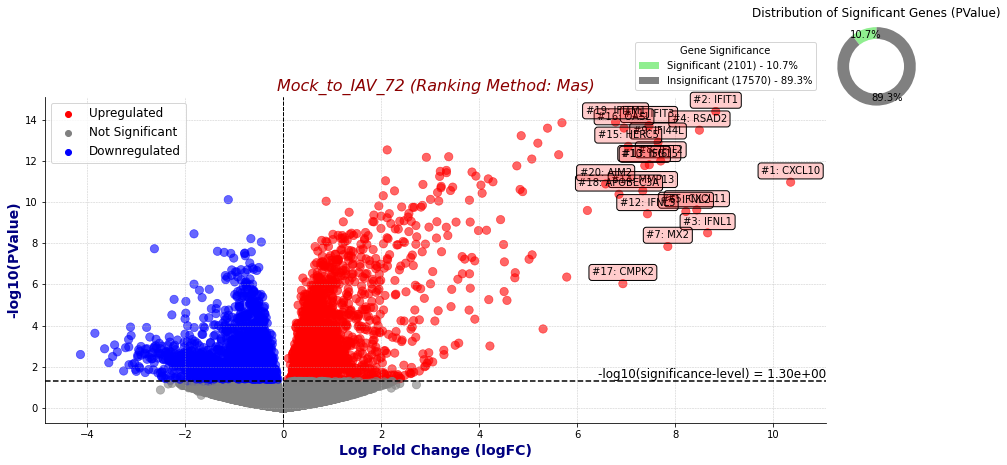

Mock_to_MPV_72


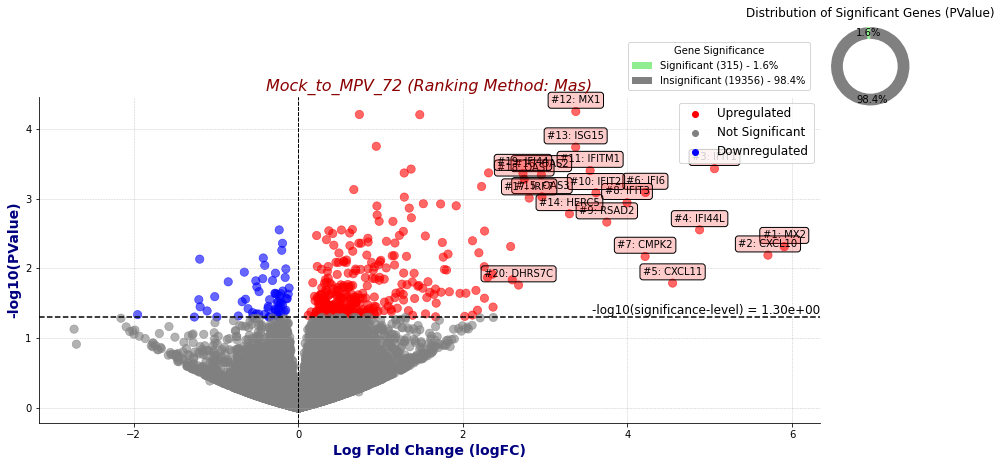

Mock_to_PIV3_72


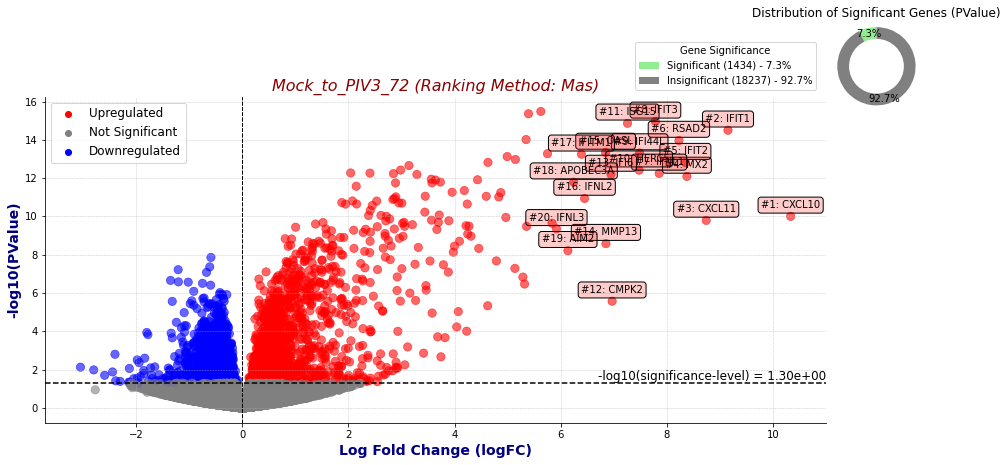

The gene whose maximum Rank is minimum among all comparisons is CXCL10
Running as a standalone script
{'method': 'PValue', 'alpha': 0.05, 'logFC_threshold': 0, 'up_or_down_or_both': 'Only_upregulated', 'highlight_genes': [], 'top_genes': 20, 'upreg_criteria': None, 'downreg_criteria': None, 'upregulated_color': '#FF0000', 'downregulated_color': '#0000FF', 'not_significant_color': '#808080', 'not_significant_between_logFC_threshold_color': '#A0A0A0', 'pie_chart_size': 0.2, 'pie_chart_position': (0.85, 0.85), 'ranking_method': 'MAS', 'Magnitude (M)': 1, 'Altitude (A)': 0, 'g100': (-1, 0.2), 'g010': (1, 0.24), 'g001': (-0.4, -0.5), 'g110': (-0.6, 0.24), 'g101': (-0.8, -0.3), 'g011': (0.7, -0.1), 'g111': (0.4, -0.6)}


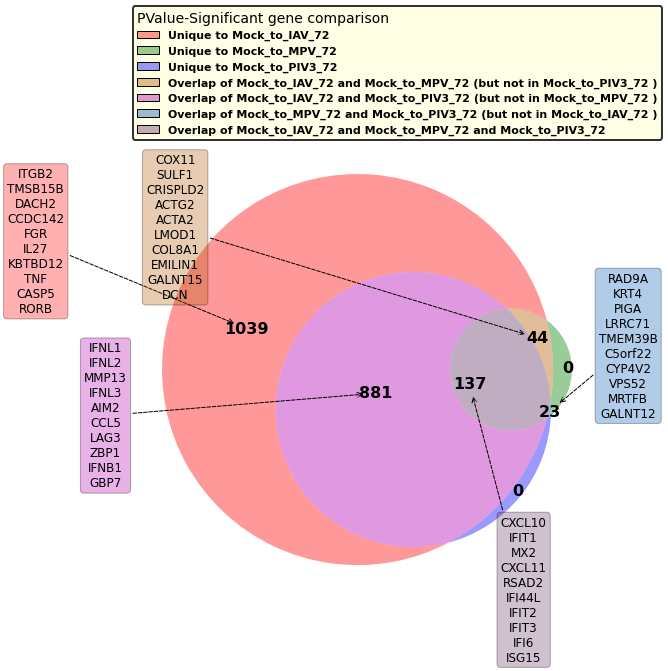

In [49]:
num_dataframes = 3

Mock_to_IAV_72= pd.read_csv("GLMQL_mock_none_72_to_IAV_none_72.csv", encoding= 'unicode_escape')
Mock_to_MPV_72= pd.read_csv("GLMQL_mock_none_72_to_MPV_none_72.csv", encoding= 'unicode_escape')
Mock_to_PIV3_72= pd.read_csv("GLMQL_mock_none_72_to_PIV3_none_72.csv", encoding= 'unicode_escape')

dataframes = {'Mock_to_IAV_72':Mock_to_IAV_72, 'Mock_to_MPV_72':Mock_to_MPV_72, 'Mock_to_PIV3_72': Mock_to_PIV3_72}
Conditions =list(dataframes.keys())




# 'method': 'PValue', 'BH', 'Bonferroni', 'BY', 'Holm', 'Hochberg'
#  'ranking_method':'MAS', 'Corner'
#'up_or_down_or_both': 'both_up_and_down_regulated','Only_upregulated', 'Only_downregulated'

# Initialize the dictionary to store the significant genes for each comparison
significant_genes_dict = {}
significant_genes_dataframe_dict = {}
All_genes_dict = {}

# Initialize the counter
i = 0


for condition in sorted(Conditions):
    i += 1
    print(f"{condition}")

    Data = dataframes[condition]
    title = f"{condition}"

    # Running the volcano_plot function and obtaining the significant genes
    AllGenes, Significant = volcano_plot(Data,M=config['Magnitude (M)'], A=config['Altitude (A)'],  title=title, method=config['method'], alpha=config['alpha'], logFC_threshold=config['logFC_threshold'], highlight_genes=config['highlight_genes'], top_genes=config['top_genes'],
                                         upreg_criteria=config['upreg_criteria'], downreg_criteria=config['downreg_criteria'], upregulated_color=config['upregulated_color'], downregulated_color=config['downregulated_color'],
                                         not_significant_color=config['not_significant_color'], not_significant_between_logFC_threshold_color=config['not_significant_between_logFC_threshold_color'],
                                         pie_chart_size=config['pie_chart_size'], pie_chart_position=config['pie_chart_position'], ranking_method=config['ranking_method'], up_or_down_or_both=config['up_or_down_or_both'],g100=config['g100'],g010=config['g010'],g001=config['g001'],g110=config['g110'],g101=config['g101'],g011=config['g011'],g111=config['g111']
)

    # Storing the significant genes in the dictionary
    key = f"{condition}"
    significant_genes = set(Significant['Gene Symbol'])
    significant_genes_dataframe = Significant
    significant_genes_dataframe_dict[key] = significant_genes_dataframe

    if significant_genes:
        significant_genes_dict[key] = significant_genes

    All_genes_dict[condition] = AllGenes

# Using positions from the config dictionary for annotations
annotation_positions = {
    'g100': (-1, 0.2),
    'g010': (1, 0.24),
    'g001': (-0.4, -0.5),
    'g110': (-0.6, 0.24),
    'g101': (-0.8, -0.3),
    'g011': (0.7, -0.1),
    'g111': (0.4, -0.8)
}

plot_venn(significant_genes_dataframe_dict, method=config['method'], ranking_method=config['ranking_method'],g100=annotation_positions['g100'],g010=annotation_positions['g010'],g001=annotation_positions['g001'],g110=annotation_positions['g110'],g101=annotation_positions['g101'],g011=annotation_positions['g011'],g111=annotation_positions['g111'])
print("Running as a standalone script")
print(config)


In [50]:
# Re-initializing to ensure clarity in the approach
conditions_significant_genes = []  # To store lists of significant genes for each condition

Conditions = {'Mock_to_IAV_72','Mock_to_MPV_72','Mock_to_PIV3_72'}

for condition in Conditions:
    gene_list = []
    BH_adjusted_p_values = significant_genes_dataframe_dict[condition]['PValue']

    for i, p in enumerate(BH_adjusted_p_values):
        if p < 0.05:
            gene_list.append(significant_genes_dataframe_dict[condition].loc[i, 'Gene Symbol'])

    # Store the significant genes list for each condition
    conditions_significant_genes.append(set(gene_list))

# Finding common significant genes among all conditions
common_significant_genes = set.intersection(*conditions_significant_genes)
common_significant_genes

####################################

filtered_df1 = significant_genes_dataframe_dict['Mock_to_IAV_72'][
    ( significant_genes_dataframe_dict['Mock_to_IAV_72']['Gene Symbol'].isin(common_significant_genes)) 
]

filtered_df2 = significant_genes_dataframe_dict['Mock_to_MPV_72'][
    ( significant_genes_dataframe_dict['Mock_to_MPV_72']['Gene Symbol'].isin(common_significant_genes)) 
]

filtered_df3 = significant_genes_dataframe_dict['Mock_to_PIV3_72'][
    ( significant_genes_dataframe_dict['Mock_to_PIV3_72']['Gene Symbol'].isin(common_significant_genes)) 
]




#################################



IAV=filtered_df1[['Gene Symbol','MAS_Score','PValue','MAS_rank']]
MPV=filtered_df2[['Gene Symbol','MAS_Score','PValue','MAS_rank']]
PIV3=filtered_df3[['Gene Symbol','MAS_Score','PValue','MAS_rank']]




################################

# Combining the dataframes
combined_df = pd.concat([IAV, MPV, PIV3])

# Your required operation starts here
# Group by 'Gene Symbol' and sum up all other columns
aggregated_df = combined_df.groupby('Gene Symbol').sum().reset_index()

# Rename columns to have 'sum_' prefix, excluding 'Gene Symbol'
aggregated_df.columns = ['Gene Symbol'] + ['sum_' + col if col != 'Gene Symbol' else col for col in aggregated_df.columns[1:]]

# Sorting the aggregated dataframe in descending order based on 'sum_MAS_rank'
aggregated_df_sorted = aggregated_df.sort_values(by='sum_MAS_rank', ascending=True).reset_index(drop=True)

aggregated_df_sorted



,Gene Symbol,sum_MAS_Score,sum_PValue,sum_MAS_rank
0,CXCL10,26.394360,0.006449,4
1,IFIT1,23.036965,0.000371,7
2,MX2,22.131575,0.004869,12
3,CXCL11,21.730536,0.016207,13
4,RSAD2,20.469420,0.002165,19
...,...,...,...,...
132,IL1R1,1.163200,0.032506,2942
133,MAML2,1.171349,0.094798,3030
134,TRAM1,0.991437,0.016056,3045
135,FBXL5,0.767974,0.051669,3576


In [51]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles

conditions_significant_genes = []  # To store lists of significant genes for each condition

Conditions = ['Mock_to_IAV_72','Mock_to_MPV_72','Mock_to_PIV3_72']

for condition in Conditions:
    gene_list = []
    BH_adjusted_p_values = significant_genes_dataframe_dict[condition]['PValue']

    for i, p in enumerate(BH_adjusted_p_values):
        if p < 0.05:
            gene_list.append(significant_genes_dataframe_dict[condition].loc[i, 'Gene Symbol'])

    # Store the significant genes list for each condition
    conditions_significant_genes.append(set(gene_list))

# Finding common significant genes among all conditions
common_significant_genes = set.intersection(*conditions_significant_genes)
common_significant_genes

####################################

filtered_df1 = significant_genes_dataframe_dict[Conditions[0]][
    ( significant_genes_dataframe_dict[Conditions[0]]['Gene Symbol'].isin(common_significant_genes)) 
]

filtered_df2 = significant_genes_dataframe_dict[Conditions[1]][
    ( significant_genes_dataframe_dict[Conditions[1]]['Gene Symbol'].isin(common_significant_genes)) 
]

filtered_df3 = significant_genes_dataframe_dict[Conditions[2]][
    ( significant_genes_dataframe_dict[Conditions[2]]['Gene Symbol'].isin(common_significant_genes)) 
]




#################################



IAV=filtered_df1[['Gene Symbol','MAS_Score','PValue','MAS_rank']]
MPV=filtered_df2[['Gene Symbol','MAS_Score','PValue','MAS_rank']]
PIV3=filtered_df3[['Gene Symbol','MAS_Score','PValue','MAS_rank']]




################################

# Combining the dataframes
combined_df = pd.concat([IAV, MPV, PIV3])

# Your required operation starts here
# Group by 'Gene Symbol' and sum up all other columns
aggregated_df = combined_df.groupby('Gene Symbol').sum().reset_index()

# Rename columns to have 'sum_' prefix, excluding 'Gene Symbol'
aggregated_df.columns = ['Gene Symbol'] + ['sum_' + col if col != 'Gene Symbol' else col for col in aggregated_df.columns[1:]]

# Sorting the aggregated dataframe in descending order based on 'sum_MAS_rank'
aggregated_df_sorted = aggregated_df.sort_values(by='sum_MAS_rank', ascending=True).reset_index(drop=True)




###########################



import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from matplotlib.patches import Patch


top_10_genes = aggregated_df_sorted['Gene Symbol'].head(10).tolist()

# Extract sets of significant genes from the dictionary for each condition
genes_set_IAV = set(significant_genes_dataframe_dict[Conditions[0]]['Gene Symbol'])
genes_set_MPV = set(significant_genes_dataframe_dict[Conditions[1]]['Gene Symbol'])
genes_set_PIV3 = set(significant_genes_dataframe_dict[Conditions[2]]['Gene Symbol'])



if len(top_10_genes)!=0:
    if gene_24 == top_10_genes[0]:
        gene_72 = top_10_genes[1]
    else:
        gene_72 = top_10_genes[0]



# # Generate the Venn diagram
# plt.figure(figsize=(12, 7))
# venn = venn3([genes_set_IAV, genes_set_MPV, genes_set_PIV3], ("","",""))
# venn_circles = venn3_circles([genes_set_IAV, genes_set_MPV, genes_set_PIV3], linestyle='dashed', linewidth=1, color="black")

# center = venn.get_label_by_id('111').get_position()

# # Make numbers inside the Venn diagram bold and larger
# for text in venn.subset_labels:
#     if text:  # Check if the label is not None
#         text.set_fontsize(14)  # Increase font size
#         text.set_fontweight('bold')  # Make font bold
        
# # Customizing colors
# colors = ['skyblue', 'lightgreen', 'salmon', 'grey', 'orange', 'brown', 'purple']
# for patch_id, color in zip(['100', '010', '001', '110', '101', '011', '111'], colors):
#     patch = venn.get_patch_by_id(patch_id)
#     if patch:
#         patch.set_color(color)
#         patch.set_edgecolor('black')  # Optional: add an edge color if needed

# # Determine a position for the annotation
# # Annotate with top 10 overall common genes and add an arrow
# annotation_text = "\n".join(top_10_genes)
# plt.annotate(annotation_text, xy=center, xytext=(1.1, 0.4), textcoords='axes fraction', ha='center', fontsize=13,
#              bbox=dict(boxstyle="round,pad=0.5", fc="purple", alpha=0.1),
#              arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.5", color="black", lw=1.5, shrinkB=10))




# # Adding legend
# legend_elements = [
#     Patch(facecolor='skyblue', label=Conditions[0]+' Unique', edgecolor='black'),
#     Patch(facecolor='lightgreen', label=Conditions[1]+' Unique', edgecolor='black'),
#     Patch(facecolor='salmon', label=Conditions[2]+' Unique', edgecolor='black'),
#     Patch(facecolor='purple', label=Conditions[0]+' & ' +Conditions[1], edgecolor='black'),
#     Patch(facecolor='orange', label=Conditions[0]+' & ' +Conditions[2], edgecolor='black'),
#     Patch(facecolor='brown', label=Conditions[1]+' & ' +Conditions[2], edgecolor='black'),
#     Patch(facecolor='grey', label='Common to all', edgecolor='black')
# ]
# plt.legend(handles=legend_elements, loc='upper center', bbox_to_anchor=(0.5, 1.20), ncol=2, title="Significant and Upregulated Genes", fontsize=12, title_fontsize=14, frameon=True, edgecolor="black")


# plt.show()




IAV_24_72


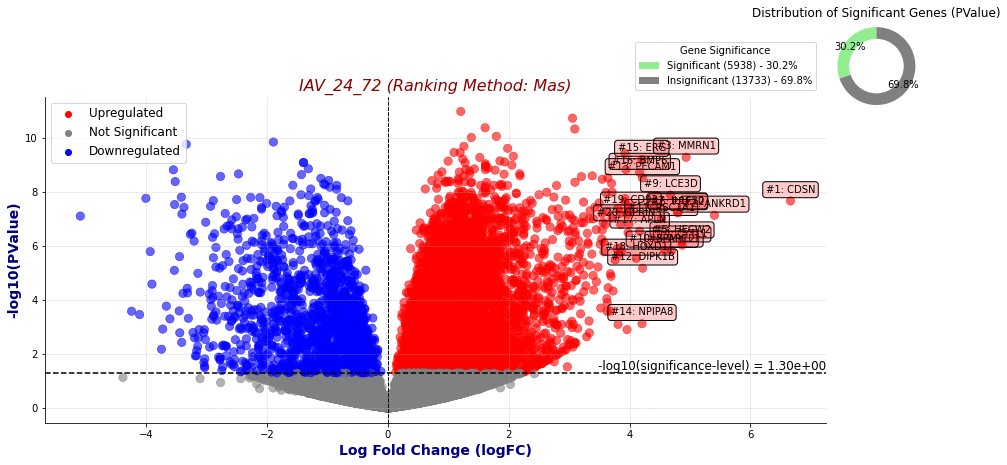

MPV_24_72


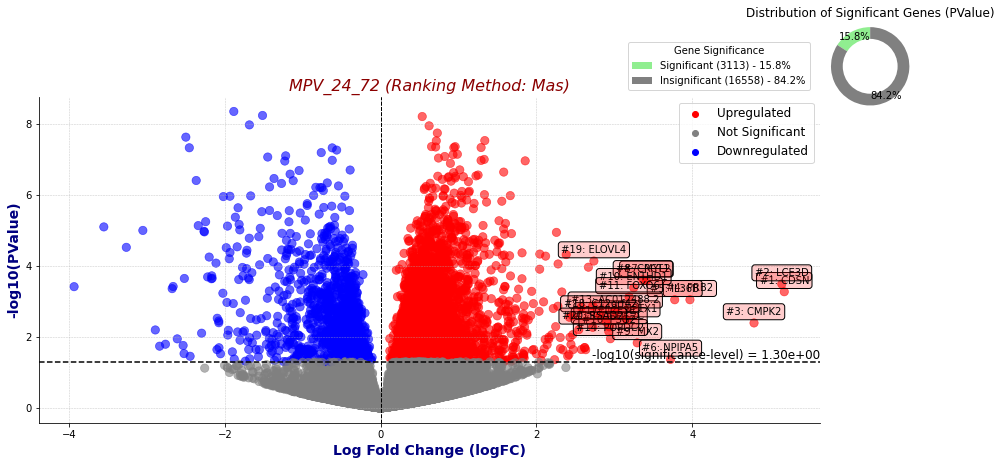

PIV3_24_72


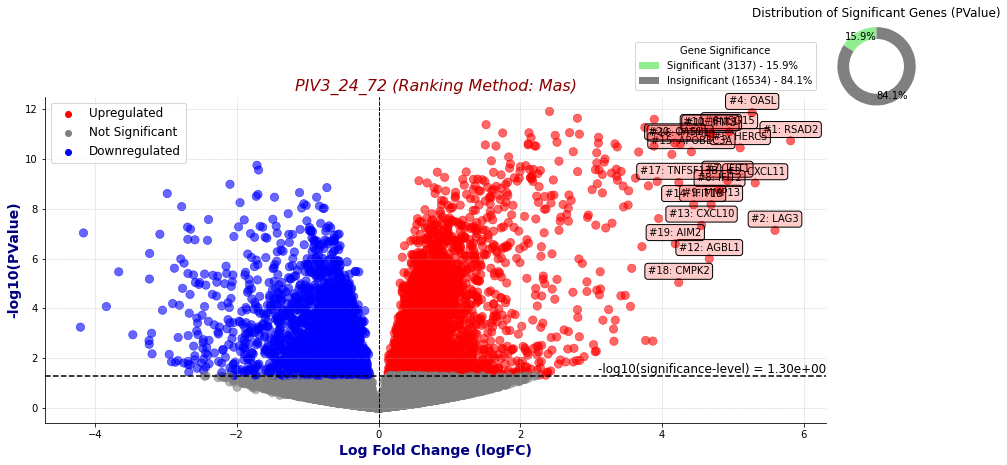

The gene whose maximum Rank is minimum among all comparisons is LCE3D
Running as a standalone script
{'method': 'PValue', 'alpha': 0.05, 'logFC_threshold': 0, 'up_or_down_or_both': 'Only_upregulated', 'highlight_genes': [], 'top_genes': 20, 'upreg_criteria': None, 'downreg_criteria': None, 'upregulated_color': '#FF0000', 'downregulated_color': '#0000FF', 'not_significant_color': '#808080', 'not_significant_between_logFC_threshold_color': '#A0A0A0', 'pie_chart_size': 0.2, 'pie_chart_position': (0.85, 0.85), 'ranking_method': 'MAS', 'Magnitude (M)': 1, 'Altitude (A)': 0, 'g100': (-1, 0.2), 'g010': (1, 0.24), 'g001': (-0.4, -0.5), 'g110': (-0.6, 0.24), 'g101': (-0.8, -0.3), 'g011': (0.7, -0.1), 'g111': (0.4, -0.6)}


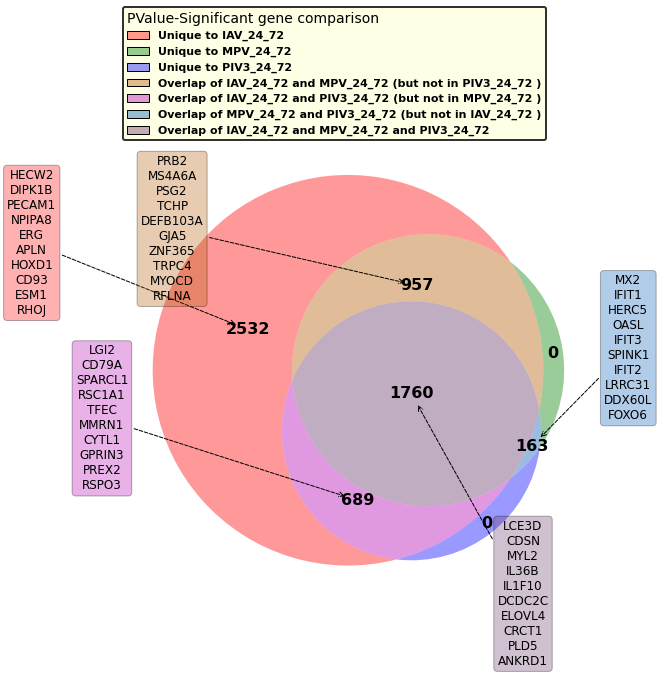

In [52]:
num_dataframes = 3

IAV_24_72= pd.read_csv("GLMQL_IAV_none_24_to_IAV_none_72.csv", encoding= 'unicode_escape')
MPV_24_72= pd.read_csv("GLMQL_MPV_none_24_to_MPV_none_72.csv", encoding= 'unicode_escape')
PIV3_24_72= pd.read_csv("GLMQL_PIV3_none_24_to_PIV3_none_72.csv", encoding= 'unicode_escape')

dataframes = {'IAV_24_72':IAV_24_72, 'MPV_24_72':MPV_24_72, 'PIV3_24_72': PIV3_24_72}
Conditions =list(dataframes.keys())






# 'method': 'PValue', 'BH', 'Bonferroni', 'BY', 'Holm', 'Hochberg'
#  'ranking_method':'MAS', 'Corner'
#'up_or_down_or_both': 'both_up_and_down_regulated','Only_upregulated', 'Only_downregulated'

# Initialize the dictionary to store the significant genes for each comparison
significant_genes_dict = {}
significant_genes_dataframe_dict = {}
All_genes_dict = {}

# Initialize the counter
i = 0


for condition in sorted(Conditions):
    i += 1
    print(f"{condition}")

    Data = dataframes[condition]
    title = f"{condition}"

    # Running the volcano_plot function and obtaining the significant genes
    AllGenes, Significant = volcano_plot(Data,M=config['Magnitude (M)'], A=config['Altitude (A)'],  title=title, method=config['method'], alpha=config['alpha'], logFC_threshold=config['logFC_threshold'], highlight_genes=config['highlight_genes'], top_genes=config['top_genes'],
                                         upreg_criteria=config['upreg_criteria'], downreg_criteria=config['downreg_criteria'], upregulated_color=config['upregulated_color'], downregulated_color=config['downregulated_color'],
                                         not_significant_color=config['not_significant_color'], not_significant_between_logFC_threshold_color=config['not_significant_between_logFC_threshold_color'],
                                         pie_chart_size=config['pie_chart_size'], pie_chart_position=config['pie_chart_position'], ranking_method=config['ranking_method'], up_or_down_or_both=config['up_or_down_or_both'],g100=config['g100'],g010=config['g010'],g001=config['g001'],g110=config['g110'],g101=config['g101'],g011=config['g011'],g111=config['g111']
)

    # Storing the significant genes in the dictionary
    key = f"{condition}"
    significant_genes = set(Significant['Gene Symbol'])
    significant_genes_dataframe = Significant
    significant_genes_dataframe_dict[key] = significant_genes_dataframe

    if significant_genes:
        significant_genes_dict[key] = significant_genes

    All_genes_dict[condition] = AllGenes

# Create the Venn diagram

# Using positions from the config dictionary for annotations
annotation_positions = {
    'g100': (-1, 0.2),
    'g010': (1, 0.24),
    'g001': (-0.4, -0.5),
    'g110': (-0.6, 0.24),
    'g101': (-0.8, -0.3),
    'g011': (0.7, -0.1),
    'g111': (0.4, -0.8)
}

plot_venn(significant_genes_dataframe_dict, method=config['method'], ranking_method=config['ranking_method'],g100=annotation_positions['g100'],g010=annotation_positions['g010'],g001=annotation_positions['g001'],g110=annotation_positions['g110'],g101=annotation_positions['g101'],g011=annotation_positions['g011'],g111=annotation_positions['g111'])
print("Running as a standalone script")
print(config)


In [53]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles

conditions_significant_genes = []  # To store lists of significant genes for each condition

Conditions = ['IAV_24_72','MPV_24_72','PIV3_24_72']

for condition in Conditions:
    gene_list = []
    BH_adjusted_p_values = significant_genes_dataframe_dict[condition]['PValue']

    for i, p in enumerate(BH_adjusted_p_values):
        if p < 0.05:
            gene_list.append(significant_genes_dataframe_dict[condition].loc[i, 'Gene Symbol'])

    # Store the significant genes list for each condition
    conditions_significant_genes.append(set(gene_list))

# Finding common significant genes among all conditions
common_significant_genes = set.intersection(*conditions_significant_genes)
common_significant_genes

####################################

filtered_df1 = significant_genes_dataframe_dict[Conditions[0]][
    ( significant_genes_dataframe_dict[Conditions[0]]['Gene Symbol'].isin(common_significant_genes)) 
]

filtered_df2 = significant_genes_dataframe_dict[Conditions[1]][
    ( significant_genes_dataframe_dict[Conditions[1]]['Gene Symbol'].isin(common_significant_genes)) 
]

filtered_df3 = significant_genes_dataframe_dict[Conditions[2]][
    ( significant_genes_dataframe_dict[Conditions[2]]['Gene Symbol'].isin(common_significant_genes)) 
]




#################################



IAV=filtered_df1[['Gene Symbol','MAS_Score','PValue','MAS_rank']]
MPV=filtered_df2[['Gene Symbol','MAS_Score','PValue','MAS_rank']]
PIV3=filtered_df3[['Gene Symbol','MAS_Score','PValue','MAS_rank']]




################################

# Combining the dataframes
combined_df = pd.concat([IAV, MPV, PIV3])

# Your required operation starts here
# Group by 'Gene Symbol' and sum up all other columns
aggregated_df = combined_df.groupby('Gene Symbol').sum().reset_index()

# Rename columns to have 'sum_' prefix, excluding 'Gene Symbol'
aggregated_df.columns = ['Gene Symbol'] + ['sum_' + col if col != 'Gene Symbol' else col for col in aggregated_df.columns[1:]]

# Sorting the aggregated dataframe in descending order based on 'sum_MAS_rank'
aggregated_df_sorted = aggregated_df.sort_values(by='sum_MAS_rank', ascending=True).reset_index(drop=True)




###########################



import matplotlib.pyplot as plt
from matplotlib_venn import venn3, venn3_circles
from matplotlib.patches import Patch


top_10_genes = aggregated_df_sorted['Gene Symbol'].head(10).tolist()

# Extract sets of significant genes from the dictionary for each condition
genes_set_IAV = set(significant_genes_dataframe_dict[Conditions[0]]['Gene Symbol'])
genes_set_MPV = set(significant_genes_dataframe_dict[Conditions[1]]['Gene Symbol'])
genes_set_PIV3 = set(significant_genes_dataframe_dict[Conditions[2]]['Gene Symbol'])

exists_24 = 1 if 'gene_24' in globals() else 0
exists_72 = 1 if 'gene_72' in globals() else 0

if exists_24 and exists_72:

    if gene_24 == top_10_genes[0] or gene_72 == top_10_genes[0]:
        if gene_24 == top_10_genes[1] or gene_72 == top_10_genes[1]:
            Time_dependent = top_10_genes[2]
        else:
            Time_dependent = top_10_genes[1]           
    else:
        Time_dependent = top_10_genes[0]
else:
    Time_dependent = top_10_genes[0]




In [54]:
IAV_24_72= pd.read_csv("GLMQL_IAV_none_24_to_IAV_none_72.csv", encoding= 'unicode_escape')
MPV_24_72= pd.read_csv("GLMQL_MPV_none_24_to_MPV_none_72.csv", encoding= 'unicode_escape')
PIV3_24_72= pd.read_csv("GLMQL_PIV3_none_24_to_PIV3_none_72.csv", encoding= 'unicode_escape')
Mock_24_72= pd.read_csv("GLMQL_mock_none_24_to_mock_none_72.csv", encoding= 'unicode_escape')

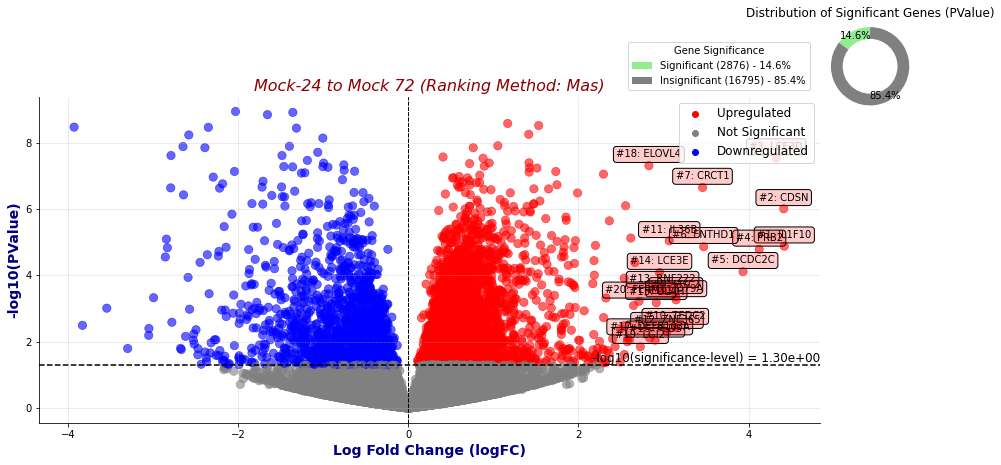

In [55]:
title = f"Mock-24 to Mock 72"

AllGenes, Significant_Mock_24_72 = volcano_plot(Mock_24_72,M=config['Magnitude (M)'], A=config['Altitude (A)'],  title=title, method=config['method'], alpha=config['alpha'], logFC_threshold=config['logFC_threshold'], highlight_genes=config['highlight_genes'], top_genes=config['top_genes'],
                                         upreg_criteria=config['upreg_criteria'], downreg_criteria=config['downreg_criteria'], upregulated_color=config['upregulated_color'], downregulated_color=config['downregulated_color'],
                                         not_significant_color=config['not_significant_color'], not_significant_between_logFC_threshold_color=config['not_significant_between_logFC_threshold_color'],
                                         pie_chart_size=config['pie_chart_size'], pie_chart_position=config['pie_chart_position'], ranking_method=config['ranking_method'], up_or_down_or_both=config['up_or_down_or_both'],g100=config['g100'],g010=config['g010'],g001=config['g001'],g110=config['g110'],g101=config['g101'],g011=config['g011'],g111=config['g111']
)

In [56]:
Significant_Mock_24_72

,Gene Symbol,logFC,logCPM,F,PValue,FDR,MAS_Score,MAS_rank,-log10(P),Category
0,IL1F10,4.418017,2.145537,56.366749,1.312677e-05,0.000882,4.418017,1,4.881842,Upregulated
1,CDSN,4.411384,3.468218,97.196394,9.789354e-07,0.000167,4.411384,2,6.009246,Upregulated
2,LCE3D,4.323585,4.358535,195.781659,2.876009e-08,0.000026,4.323585,3,7.541210,Upregulated
3,PRB2,4.123644,2.128225,53.690200,1.640741e-05,0.001024,4.123644,4,4.784960,Upregulated
4,DCDC2C,3.933816,2.001661,135.566342,7.745351e-05,0.002622,3.933816,5,4.110959,Upregulated
...,...,...,...,...,...,...,...,...,...,...
2871,RPL36AL,0.136162,8.414883,5.481716,3.945796e-02,0.198460,0.136162,2872,1.403865,Upregulated
2872,RND3,0.134286,8.457378,6.498294,2.735829e-02,0.152975,0.134286,2873,1.562911,Upregulated
2873,ADIPOR1,0.122781,8.347073,5.232744,4.335359e-02,0.210882,0.122781,2874,1.362975,Upregulated
2874,EIF2S2,0.116733,8.636306,5.641242,3.718409e-02,0.190222,0.116733,2875,1.429643,Upregulated


In [57]:
dfff1 = significant_genes_dataframe_dict['IAV_24_72'][['Gene Symbol', 'MAS_rank','logFC']].reset_index(drop=True)
dfff2 =significant_genes_dataframe_dict['MPV_24_72'][['Gene Symbol', 'MAS_rank','logFC']].reset_index(drop=True)
dfff3 = significant_genes_dataframe_dict['PIV3_24_72'][['Gene Symbol', 'MAS_rank','logFC']].reset_index(drop=True)
dfff4=Significant_Mock_24_72[['Gene Symbol','MAS_rank','logFC']].reset_index(drop=True)

In [58]:
dfff1

,Gene Symbol,MAS_rank,logFC
0,CDSN,1,6.664207
1,ANKRD1,2,5.405293
2,MMRN1,3,4.936240
3,CYTL1,4,4.870206
4,HECW2,5,4.868418
...,...,...,...
5933,H3-3B,5934,0.161767
5934,TTC9,5935,0.155370
5935,GTF2E2,5936,0.147466
5936,UBE2D3,5937,0.138124


In [59]:
import pandas as pd




# Example usage:
df_sorted = aggregate_mas_ranks(dfff1, dfff2, dfff3, dfff4)
df_sorted


,Gene Symbol,sum__MAS_rank
4,LCE3D,192
0,CDSN,229
12,DCDC2C,305
11,IL36B,321
3,MYL2,356
...,...,...
1422,SERINC3,32209
1452,EHF,32556
1447,SEC61B,32616
1418,TVP23B,32647


In [60]:
Conditions[0]

'IAV_24_72'

In [61]:
Time_dependent

'LCE3D'

In [62]:
READY= pd.read_csv("READY.csv", encoding= 'unicode_escape').set_index('Conditions')


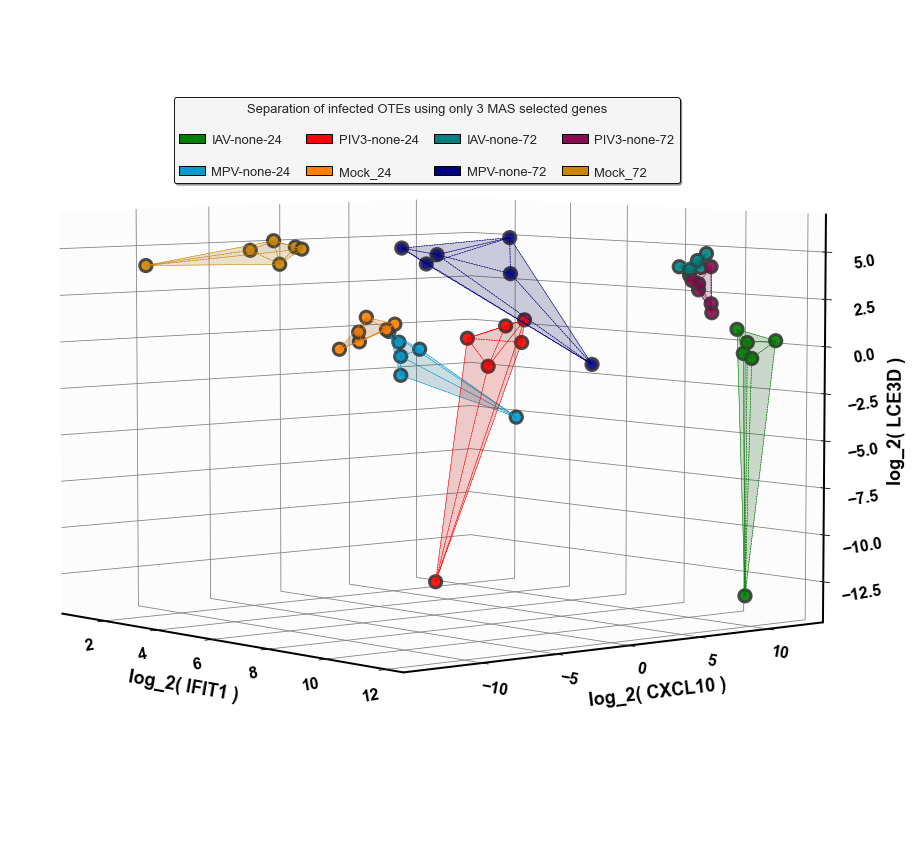

In [63]:

exists_24 = 1 if 'gene_24' in globals() else 0
exists_72 = 1 if 'gene_72' in globals() else 0

if exists_24 and exists_72:
    dataT=READY


    x_column = gene_24
    y_column = gene_72
    z_column = Time_dependent

    geness=[ x_column,y_column,z_column]


    Nano=dataT


    colorsd={
        0:'green', 1:'green', 2:'green', 3:'green', 4:'green', 5:'green',
        6:'#009ACD', 7:'#009ACD', 8:'#009ACD', 9:'#009ACD', 10:'#009ACD', 11:'#009ACD',
        12:'red', 13:'red', 14:'red', 15:'red', 16:'red', 17:'red',
        18:'#FF8000', 19:'#FF8000', 20:'#FF8000', 21:'#FF8000', 22:'#FF8000', 23:'#FF8000',
        24:'#008080', 25:'#008080', 26:'#008080', 27:'#008080', 28:'#008080', 29:'#008080',
         30:'#000080', 31:'#000080', 32:'#000080', 33:'#000080', 34:'#000080', 35:'#000080',
         36:'#8B0A50', 37:'#8B0A50', 38:'#8B0A50', 39:'#8B0A50', 40:'#8B0A50', 41:'#8B0A50',
        42:'#CD8500', 43:'#CD8500', 44:'#CD8500', 45:'#CD8500', 46:'#CD8500', 47:'#CD8500',
    }





    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.spatial import ConvexHull
    from matplotlib.patches import Patch

    # Assume Nano is your dataframe
    words_to_remove = ['UV', 'untreated']
    pattern = '|'.join(words_to_remove)  # this will create a pattern like 'UV|untreated|mock'

    # Get the rows where index contains one of the specified words
    rows_to_remove = dataT.index[Nano.index.str.contains(pattern, case=False)]

    # Drop these rows from the dataframe
    Nano_filtered = dataT.drop(rows_to_remove)

    # Extract values of the three genes from the Nano DataFrame
    genes_data = np.log2(Nano_filtered [geness].values)


    # Creating a 3D plot with a larger size and white background
    plt.style.use('seaborn-whitegrid')

    # Create a 3D scatter plot with a larger figsize
    fig = plt.figure(figsize=(12, 12))
    ax = fig.add_subplot(111, projection='3d')


    # Set background color of the 3D plot to a light gray shade
    ax.xaxis.pane.fill = True
    ax.yaxis.pane.fill = True
    ax.zaxis.pane.fill = True
    ax.xaxis.pane.set_edgecolor('w')
    ax.yaxis.pane.set_edgecolor('w')
    ax.zaxis.pane.set_edgecolor('w')





    # Adjust spines to give a 3D cube effect
    ax.w_xaxis.line.set_lw(2.0)
    ax.w_yaxis.line.set_lw(2.0)
    ax.w_zaxis.line.set_lw(2.0)
    ax.xaxis.pane.set_facecolor((0.98, 0.98, 0.98, 1.0))
    ax.yaxis.pane.set_facecolor((0.98, 0.98, 0.98, 1.0))
    ax.zaxis.pane.set_facecolor((0.98, 0.98, 0.98, 1.0))



    # Rotate ticks for a more dynamic look
    ax.tick_params(axis='x', rotation=10, pad=10)
    ax.tick_params(axis='y', rotation=-10, pad=10)
    ax.tick_params(axis='z', rotation=10, pad=10)




    # Plot each group with its convex hull
    for i in range(0, len(colorsd), 6):
        group_data = genes_data[i:i+6]

        # Fancy scatter plot
        ax.scatter(
            group_data[:, 0], 
            group_data[:, 1], 
            group_data[:, 2], 
            s=150,       
            alpha=.9,
            color=colorsd[i],  
            depthshade=True,
            edgecolors='#3B3B3B', 
            linewidth=3
        )

        # Compute the convex hull and plot
        hull = ConvexHull(group_data)
        ax.plot_trisurf(
            group_data[:,0], 
            group_data[:,1], 
            group_data[:,2], 
            triangles=hull.simplices, 
            linewidth=0.5, 
            linestyle='--',
            edgecolors=colorsd[i], 
            alpha=0.1, 
            color=colorsd[i]
        )

    Unique1=['IAV-none-24','MPV-none-24','PIV3-none-24','Mock_24', 'IAV-none-72','MPV-none-72','PIV3-none-72','Mock_72']

    # Create legend elements
    legend_elements = [Patch(facecolor=colorsd[i*6], edgecolor='black', label=condition) for i, condition in enumerate(Unique1)]

    # Add legend to the plot
    legend = ax.legend(handles=legend_elements, 
        title='Separation of infected OTEs using only 3 MAS selected genes', 
        fontsize=13,  
        title_fontsize=13,  
        loc='upper left', 
        bbox_to_anchor=(0.19, 0.9),  # Position legend to the top left
        ncol=4, 
        frameon=True, 
        edgecolor='black', 
        columnspacing=1.2, 
        handletextpad=0.5, 
        labelspacing=1.5,
        fancybox=True,  # Use a fancy box
        shadow=True,  # Shadow beneath the legend
        framealpha=0.9  # Adjust the opacity of the frame
    )

    # Adjust the axis labels to represent the genes with bold fontweight
    ax.set_xlabel('log_2( '+ geness[0]+ ' )', labelpad=20, fontsize=18, color="black", fontweight='bold')
    ax.set_ylabel('log_2( '+geness[1]+ ' )', labelpad=20, fontsize=18, color="black", fontweight='bold')
    ax.set_zlabel('log_2( '+geness[2]+ ' )', labelpad=20, fontsize=18, color="black", fontweight='bold')




    # Set larger tick labels with bold fontweight and black color
    # Set tick parameters
    ax.tick_params(axis='x', labelsize=16, colors='black', pad=7, width=2)
    ax.tick_params(axis='y', labelsize=16, colors='black', pad=6, width=2)
    ax.tick_params(axis='z', labelsize=16, colors='black', pad=14, width=2)

    # Make x-axis tick labels bold
    for label in ax.get_xticklabels():
        label.set_fontweight('bold')

    # Make y-axis tick labels bold
    for label in ax.get_yticklabels():
        label.set_fontweight('bold')

    # Make z-axis tick labels bold
    for label in ax.get_zticklabels():
        label.set_fontweight('bold')

    # Set the axis line colors to black
    ax.w_xaxis.line.set_color('black')
    ax.w_yaxis.line.set_color('black')
    ax.w_zaxis.line.set_color('black')

    # Set the grid color to black
    ax.xaxis._axinfo["grid"]['color'] =  'grey'
    ax.yaxis._axinfo["grid"]['color'] =  'grey'
    ax.zaxis._axinfo["grid"]['color'] =  'grey'

    # Adding a grid
    ax.grid(True, linestyle='--', linewidth=0.7, alpha=0.7)


    # Allow changing the viewing angle
    ax.view_init(elev=5, azim=180+140) # You can change 'elev' and 'azim' values to get a different view





    # ax.set_xlim([6, 13.5])
    # ax.set_ylim([8.5, 11])
    # ax.set_zlim([8, 12.5])

    plt.tight_layout()
    plt.show()















              precision    recall  f1-score   support

           1       1.00      1.00      1.00         6
           2       0.67      0.67      0.67         6
           3       0.67      0.67      0.67         6
           4       0.83      0.83      0.83         6
           5       0.86      1.00      0.92         6
           6       0.83      0.83      0.83         6
           7       1.00      0.83      0.91         6
           8       1.00      1.00      1.00         6

    accuracy                           0.85        48
   macro avg       0.86      0.85      0.85        48
weighted avg       0.86      0.85      0.85        48



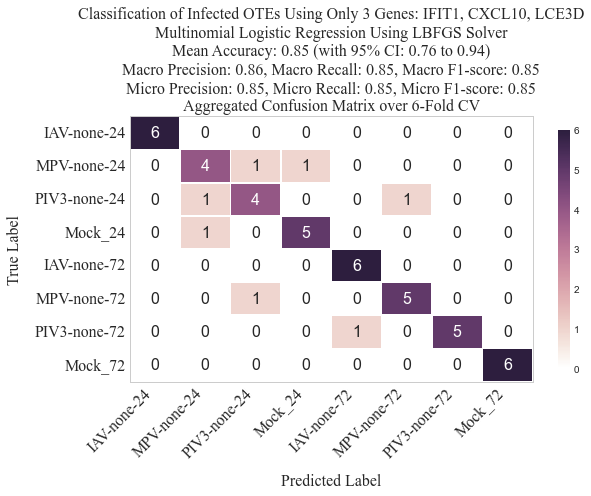

In [64]:
exists_24 = 1 if 'gene_24' in globals() else 0
exists_72 = 1 if 'gene_72' in globals() else 0

if exists_24 and exists_72:

    geness=[gene_24, gene_72, Time_dependent]





    Unique1=['IAV-none-24','MPV-none-24','PIV3-none-24','Mock_24', 'IAV-none-72','MPV-none-72','PIV3-none-72','Mock_72']


    colorsd={
        0:'green', 1:'green', 2:'green', 3:'green', 4:'green', 5:'green',
        6:'#009ACD', 7:'#009ACD', 8:'#009ACD', 9:'#009ACD', 10:'#009ACD', 11:'#009ACD',
        12:'red', 13:'red', 14:'red', 15:'red', 16:'red', 17:'red',
        18:'#FF8000', 19:'#FF8000', 20:'#FF8000', 21:'#FF8000', 22:'#FF8000', 23:'#FF8000',
        24:'#008080', 25:'#008080', 26:'#008080', 27:'#008080', 28:'#008080', 29:'#008080',
         30:'#000080', 31:'#000080', 32:'#000080', 33:'#000080', 34:'#000080', 35:'#000080',
         36:'#8B0A50', 37:'#8B0A50', 38:'#8B0A50', 39:'#8B0A50', 40:'#8B0A50', 41:'#8B0A50',
        42:'#CD8500', 43:'#CD8500', 44:'#CD8500', 45:'#CD8500', 46:'#CD8500', 47:'#CD8500',
    }





    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    from scipy.spatial import ConvexHull
    from matplotlib.patches import Patch


    Nano=DATA.copy()


    words_to_remove = ['UV', 'untreated']
    pattern = '|'.join(words_to_remove)  # this will create a pattern like 'UV|untreated|mock'

    # Get the rows where index contains one of the specified words
    rows_to_remove = Nano.index[Nano.index.str.contains(pattern, case=False)]

    # Drop these rows from the dataframe
    Nano_filtered = Nano.drop(rows_to_remove)

    # Extract values of the three genes from the Nano DataFrame
    genes_data = np.log2(Nano_filtered [geness].values)


    # Creating a 3D plot with a larger size and white background
    plt.style.use('seaborn-whitegrid')














    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from sklearn.ensemble import AdaBoostClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.model_selection import StratifiedKFold, cross_val_score
    from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, 
                                 precision_score, recall_score, f1_score)
    from lightgbm import LGBMClassifier
    import matplotlib.pyplot as plt
    import matplotlib.font_manager as font_manager


    #selected_genes=['PFKFB3', 'SPRR2E', 'MT1X', 'TMEM31', 'CIITA']



    from sklearn.preprocessing import StandardScaler

    ## DATAA=Nano_filtered[geness]
    # Create a classification column
    # Assuming `DATAA` has rows representing samples:
    DATAA=Nano_filtered[geness]
    DATAA['Virus_Type'] = (DATAA.reset_index().index // 6) + 1
    # Combine the two lists
    new_list = geness
    # Set up data and model
    X = np.log2(DATAA[new_list])
    y = DATAA['Virus_Type']


    heat=np.log2(Nano[geness])

    # # Normalize X
    # normalize_data = True  # <-- Set this to True or False depending on if you want normalization or not
    # if normalize_data:
    #     scaler = StandardScaler()
    #     X = scaler.fit_transform(X)
    #     X = pd.DataFrame(X, columns=new_list, index=DATAA.index)  # Convert back to DataFrame with original indices and columns

    from sklearn.linear_model import LogisticRegression
    from sklearn.multiclass import OneVsOneClassifier

    clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)

    # Stratified K-Fold


    # Initialize variables to aggregate metrics over all folds
    agg_conf_matrix = np.zeros((len(y.unique()), len(y.unique())))
    all_predictions, all_true = [], []

    # Initialize variables to aggregate metrics over all folds
    agg_conf_matrix = np.zeros((len(y.unique()), len(y.unique())))
    all_predictions, all_true = [], []
    accuracies = []  # <-- List to save the accuracy for each fold


    skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=42)

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)

        # Compute and save accuracy for this fold
        fold_accuracy = accuracy_score(y_test, y_pred)
        accuracies.append(fold_accuracy)

        all_predictions.extend(y_pred)
        all_true.extend(y_test)
        agg_conf_matrix += confusion_matrix(y_test, y_pred)

    # Compute mean, standard deviation, and standard error of accuracies
    mean_accuracy = np.mean(accuracies)
    std_accuracy = np.std(accuracies)
    se_accuracy = std_accuracy / np.sqrt(len(accuracies))  # Standard error


    # For a 95% CI with 4 degrees of freedom (6-1), t value is approx. 2.571
    t_value = 2.571

    margin_of_error = t_value * se_accuracy

    lower_bound = mean_accuracy - margin_of_error
    upper_bound = mean_accuracy + margin_of_error
    upper_bound = min(1, upper_bound)

    # Compute metrics
    accuracy = accuracy_score(all_true, all_predictions)
    macro_precision = precision_score(all_true, all_predictions, average='macro')
    macro_recall = recall_score(all_true, all_predictions, average='macro')
    macro_f1 = f1_score(all_true, all_predictions, average='macro')
    micro_precision = precision_score(all_true, all_predictions, average='micro')
    micro_recall = recall_score(all_true, all_predictions, average='micro')
    micro_f1 = f1_score(all_true, all_predictions, average='micro')

    # Print class-wise report
    print(classification_report(all_true, all_predictions))



    # Visualize the aggregated confusion matrix
    plt.figure(figsize=(9, 7))
    cmap = sns.cubehelix_palette(light=1, as_cmap=True)
    heatmap = sns.heatmap(agg_conf_matrix, annot=True, cmap=cmap, fmt=".0f",
                         xticklabels=Unique1, yticklabels=Unique1,  # Use Unique1 list for tick labels
                         linewidths=.7, cbar_kws={"shrink": .9},
                         annot_kws={"size": 16}) 

    # Enhancements
    title = (f'Classification of Infected OTEs Using Only 3 Genes: {", ".join(geness)}\n'
             'Multinomial Logistic Regression Using LBFGS Solver\n'
             f'Mean Accuracy: {mean_accuracy:.2f} (with 95% CI: {lower_bound:.2f} to {upper_bound:.2f})\n'
             f'Macro Precision: {macro_precision:.2f}, Macro Recall: {macro_recall:.2f}, Macro F1-score: {macro_f1:.2f}\n'
             f'Micro Precision: {micro_precision:.2f}, Micro Recall: {micro_recall:.2f}, Micro F1-score: {micro_f1:.2f}\n'
             'Aggregated Confusion Matrix over 6-Fold CV'
            )



    title_font = font_manager.FontProperties(family='Times New Roman', size=14)
    label_font = font_manager.FontProperties(family='Times New Roman', size=14)
    tick_font = font_manager.FontProperties(family='Times New Roman', size=12)

    plt.title(title, fontsize=16,fontproperties=title_font)
    plt.xlabel('Predicted Label', fontsize=16, labelpad=12,fontproperties=label_font)
    plt.ylabel('True Label', fontsize=16, labelpad=12,fontproperties=label_font)
    plt.xticks(rotation=45, ha="right", fontsize=16,fontproperties=label_font)
    plt.yticks(fontsize=16,fontproperties=label_font)

    # Highlight diagonal
    for _, spine in heatmap.spines.items():
        spine.set_visible(True)

    # Show the plot without clipping labels
    plt.tight_layout()
    plt.show()

    # Get coefficients and intercepts from the model
    coefficients = clf.coef_
    intercepts = clf.intercept_

    # Assuming geness holds the names of the genes used in the model
    gene_names = geness  








